Printed copies of *Elements of Data Science* are available now, with a **full color interior**.

From July 17 to July 31, [get 20% off at Lulu.com](https://www.lulu.com/shop/allen-downey/elements-of-data-science/paperback/product-9dyrwn.html).

# Relationships

[Click here to run this notebook on Colab](https://colab.research.google.com/github/AllenDowney/ElementsOfDataScience/blob/v1/09_relationships.ipynb).

In [1]:
from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + str(local))
    return filename

download('https://raw.githubusercontent.com/AllenDowney/ElementsOfDataScience/v1/utils.py')

import utils

This chapter explores relationships between variables.

* We will visualize relationships using scatter plots, box plots, and violin plots,

* And we will quantify relationships using correlation and simple regression.

The most important lesson in this chapter is that you should always visualize the relationship between variables before you try to quantify it -- otherwise, you are likely to be misled.

## Exploring relationships

So far we have mostly considered one variable at a time.  Now it's time to explore relationships between variables.
As a first example, we'll look at the relationship between height and weight.
We'll use data from the Behavioral Risk Factor Surveillance System (BRFSS), which is run by the Centers for Disease Control.
Based on the BRFSS data from 2021, I have created an extract with one row for each survey respondent and one column for each of the variables I selected.

You can read about the BRFSS at  at <https://www.cdc.gov/brfss>.

In [2]:
download('https://github.com/AllenDowney/ElementsOfDataScience/raw/v1/data/brfss_2021.hdf');

In [3]:
import pandas as pd

brfss = pd.read_hdf('brfss_2021.hdf', 'brfss')
brfss.shape

(438693, 10)

Here are the first few rows.

In [64]:
brfss.head()

,SEQNO,HTM4,WTKG3,_SEX,_AGEG5YR,_VEGESU1,_INCOMG1,_LLCPWT,_HTM4G10,AGE
0,2021000001,150.0,32.66,2,11.0,2.14,3.0,744.745531,140.0,72.0
1,2021000002,168.0,NaN,2,10.0,1.28,NaN,299.137394,160.0,67.0
2,2021000003,165.0,77.11,2,11.0,0.71,2.0,587.862986,160.0,72.0
3,2021000004,163.0,88.45,2,9.0,1.65,5.0,1099.621570,160.0,62.0
4,2021000005,180.0,93.44,1,12.0,2.58,2.0,1711.825870,170.0,77.0


In [65]:
brfss.drop(columns='SEQNO').head()

,HTM4,WTKG3,_SEX,_AGEG5YR,_VEGESU1,_INCOMG1,_LLCPWT,_HTM4G10,AGE
0,150.0,32.66,2,11.0,2.14,3.0,744.745531,140.0,72.0
1,168.0,NaN,2,10.0,1.28,NaN,299.137394,160.0,67.0
2,165.0,77.11,2,11.0,0.71,2.0,587.862986,160.0,72.0
3,163.0,88.45,2,9.0,1.65,5.0,1099.621570,160.0,62.0
4,180.0,93.44,1,12.0,2.58,2.0,1711.825870,170.0,77.0


The BRFSS includes hundreds of variables.
For the examples in this chapter, we'll work with just these nine.
The ones we'll start with are `HTM4`, which records each respondent's height in centimeters, and `WTKG3`, which records weight in kilograms.

In [5]:
height = brfss['HTM4']
weight = brfss['WTKG3']

To visualize the relationship between these variables, we'll make a **scatter plot**, which shows one marker for each pair of values.
Scatter plots are common and readily understood, but they are surprisingly hard to get right.
As a first attempt, we'll use `plot` with the style string `o`, which plots a circle for each data point.

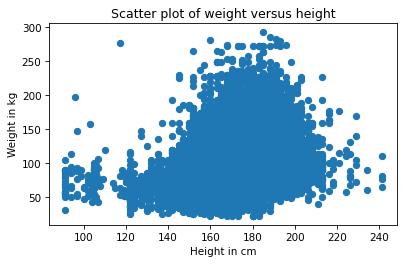

In [6]:
import matplotlib.pyplot as plt

plt.plot(height, weight, 'o')

plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')
plt.title('Scatter plot of weight versus height');

Each marker represents the height and weight of one person.
Based on the shape of the result, it looks like taller people are heavier, but there are a few things about this plot that make it hard to interpret.
Most importantly, it is **overplotted**, which means that there are markers piled on top of each other so you can't tell where there are a lot of data points and where there is just one.
When that happens, the picture can be misleading.

One way to improve the plot is to use transparency, which we can do with the keyword argument `alpha`.
The lower the value of alpha, the more transparent each data point is.  
Here's what it looks like with `alpha=0.01`.

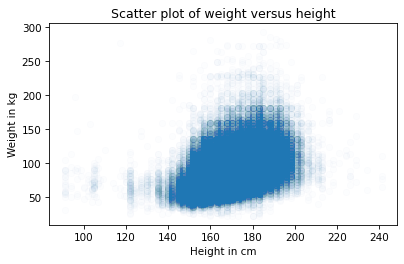

In [7]:
plt.plot(height, weight, 'o', alpha=0.01)

plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')
plt.title('Scatter plot of weight versus height');

This is better, but there are so many data points, the scatter plot is still overplotted.  The next step is to make the markers smaller.
With `markersize=0.5` and a low value of alpha, the scatter plot is less saturated.
Here's what it looks like.

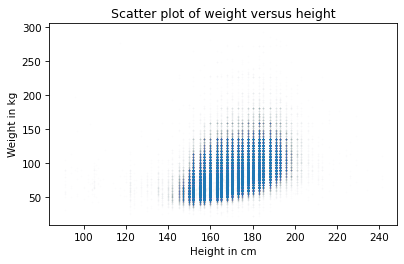

In [8]:
plt.plot(height, weight, 'o', alpha=0.01, markersize=0.5)

plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')
plt.title('Scatter plot of weight versus height');

Again, this is better, but now we can see that the points fall in discrete columns.
That's because most heights were reported in inches and converted to centimeters.
We can break up the columns by adding random noise to the values, which is called **jittering**.
We'll can use NumPy to generate noise from a normal distribution with mean 0 and standard deviation 2.

In [9]:
import numpy as np

noise = np.random.normal(0, 2, size=len(brfss))
height_jitter = height + noise

Here's what the plot looks like with jittered heights.

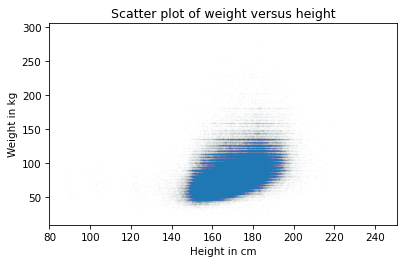

In [10]:
plt.plot(height_jitter, weight, 'o', alpha=0.01, markersize=0.5)

plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')
plt.title('Scatter plot of weight versus height');

The columns are gone, but now we can see that there are rows where people rounded off their weight.
We can fix that by jittering weight, too.

In [11]:
noise = np.random.normal(0, 2, size=len(brfss))
weight_jitter = weight + noise

Here's what it looks like.

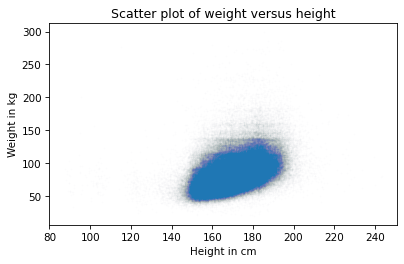

In [12]:
plt.plot(height_jitter, weight_jitter, 'o', 
         alpha=0.01, markersize=0.5)

plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')
plt.title('Scatter plot of weight versus height');

Finally, let's zoom in on the area where most of the data points are.
The functions `xlim` and `ylim` set the lower and upper limits of the x-axis and y-axis; in this case, we plot heights from 140 to 200 centimeters and weights up to 160 kilograms.
Here's what it looks like.

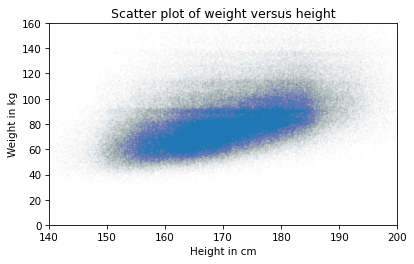

In [13]:
plt.plot(height_jitter, weight_jitter, 'o', alpha=0.01, markersize=0.5)

plt.xlim([140, 200])
plt.ylim([0, 160])
plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')
plt.title('Scatter plot of weight versus height');

Now we have a reliable picture of the relationship between height and weight.
Below you can see the misleading plot we started with and the more reliable one we ended with.
They are clearly different, and they suggest different relationships between these variables.

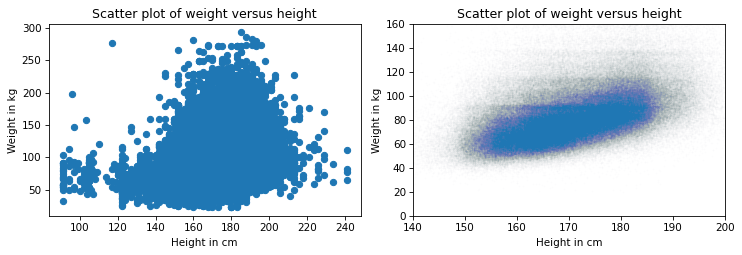

In [14]:
# Set the figure size
plt.figure(figsize=(8.75, 3.2))

# Create subplots with 2 rows, 1 column, and start plot 1
plt.subplot(1, 2, 1)
plt.plot(height, weight, 'o')

plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')
plt.title('Scatter plot of weight versus height')

# Adjust the layout so the two plots don't overlap
plt.tight_layout()

# Start plot 2
plt.subplot(1, 2, 2)

plt.plot(height_jitter, weight_jitter, 'o', alpha=0.01, markersize=0.5)

plt.xlim([140, 200])
plt.ylim([0, 160])
plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')
plt.title('Scatter plot of weight versus height')
plt.tight_layout()

The point of this example is that it takes some effort to make an effective scatter plot.

**Exercise:** Do people tend to gain weight as they get older?
We can answer this question by visualizing the relationship between weight and age. 
But before we make a scatter plot, it is a good idea to visualize distributions one variable at a time.
So let's look at the distribution of age.

The BRFSS dataset includes a column, `AGE`, which represents each respondent's age in years. To protect respondents' privacy, ages are rounded off into 5-year bins.
The values in `AGE` are the midpoints of the bins.

- Extract the variable `'AGE'` from `brfss` and assign it to `age`.

- Plot the PMF of `age` as a bar chart, using `Pmf` from `empiricaldist`.

In [15]:
try:
    import empiricaldist
except ImportError:
    !pip install empiricaldist

from empiricaldist import Pmf

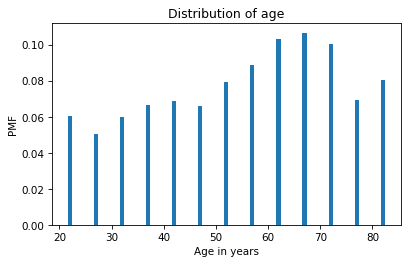

In [16]:
# Solution

# Extract AGE
age = brfss['AGE']

# Plot the PMF
Pmf.from_seq(age).bar()

# Label the axes
plt.xlabel('Age in years')
plt.ylabel('PMF')
plt.title('Distribution of age');

**Exercise:** Now let's look at the distribution of weight.
The column that contains weight in kilograms is `WTKG3`.
Because this column contains many unique values, displaying it as a PMF doesn't work very well.
Instead, use `Cdf` from `empiricaldist` to plot the CDF of weight.

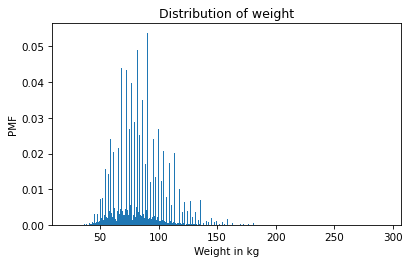

In [17]:
Pmf.from_seq(weight).bar()

plt.xlabel('Weight in kg')
plt.ylabel('PMF')
plt.title('Distribution of weight');

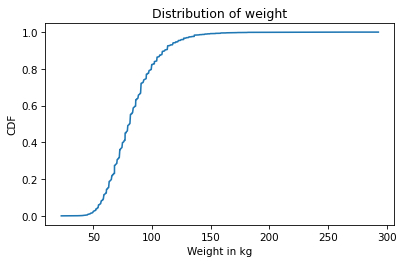

In [18]:
# Solution

from empiricaldist import Cdf

Cdf.from_seq(weight).plot()

plt.xlabel('Weight in kg')
plt.ylabel('CDF')
plt.title('Distribution of weight');

**Exercise:** Now make a scatter plot of `weight` versus `age`.
Adjust `alpha` and `markersize` to avoid overplotting.
Use `ylim` to limit the y-axis from 0 to 200 kilograms.

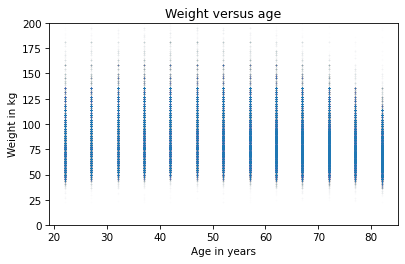

In [19]:
# Solution

plt.plot(age, weight, 'o', alpha=0.01, markersize=0.5)

plt.xlabel('Age in years')
plt.ylim([0, 200])
plt.ylabel('Weight in kg')
plt.title('Weight versus age');

**Exercise:** In the previous exercise, the ages fall in columns because they've been rounded into 5-year bins.
If we jitter them, the scatter plot will show the relationship more clearly.

- Add random noise to `age` with mean `0` and standard deviation `2.5`.
- Make a scatter plot and adjust `alpha` and `markersize` again.

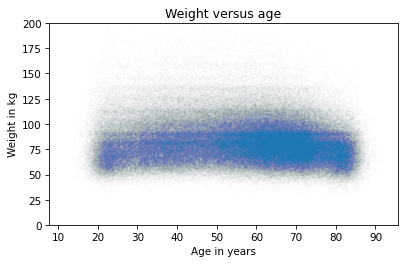

In [20]:
# Solution

noise = np.random.normal(0, 2.5, size=len(brfss))
age_jitter = age + noise

plt.plot(age_jitter, weight_jitter, 'o', 
         alpha=0.01, markersize=0.5)

plt.xlabel('Age in years')
plt.ylabel('Weight in kg')
plt.ylim([0, 200])
plt.title('Weight versus age');

## Visualizing relationships

In the previous section we used scatter plots to visualize the relationship between weight and height.
In this section, we'll explore the relationship between weight and *age*, and we'll see two new ways to visualize relationships: box plots and violin plots.

Let's start with a scatter plot.

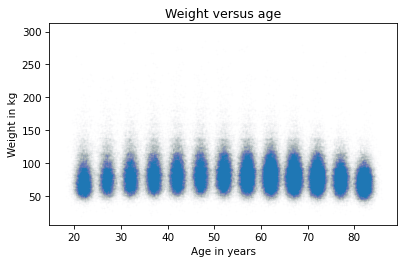

In [21]:
age = brfss['AGE']
noise = np.random.normal(0, 1.0, size=len(brfss))
age_jitter = age + noise

plt.plot(age_jitter, weight_jitter, 'o', alpha=0.01, markersize=0.5)

plt.xlabel('Age in years')
plt.ylabel('Weight in kg')
plt.title('Weight versus age');

The ages are jittered, but the standard deviation of the noise is small enough that there's still space between the columns.
That makes it possible to see the shape of the distribution in each age group, as well as the differences between groups.

If we take this idea one step farther, we can use KDE to estimate the density function in each column and plot it.
This way of visualizing the data is called a **violin plot**.
Seaborn provides a function that makes violin plots, but before we can use it, we have to get rid of any rows with missing data.
Here's how:

In [22]:
data = brfss.dropna(subset=['AGE', 'WTKG3'])
data.shape

(393080, 10)

`dropna` creates a new `DataFrame` that omits the rows in `brfss` where `AGE` or `WTKG3` are `NaN`.
Now we can call `violinplot` like this:

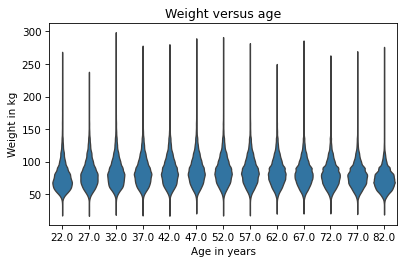

In [23]:
import seaborn as sns

sns.violinplot(x='AGE', y='WTKG3', data=data, inner=None)

plt.xlabel('Age in years')
plt.ylabel('Weight in kg')
plt.title('Weight versus age');

Documentation of `violinplot` is at <https://seaborn.pydata.org/generated/seaborn.violinplot.html>.

The `x` and `y` arguments are the names of columns from `data`, which is the `DataFrame` we just created.
The argument `inner=None` simplifies the plot.
In the result each shape shows the distribution of weight in one age group.
The width of each shape is proportional to the estimated density, so it's like two vertical KDEs plotted back to back.

Another, related way to look at data like this is called a **box plot**, which shows summary statistics of the values in each group.
Seaborn provides a function that makes box plots -- we can call it like this:

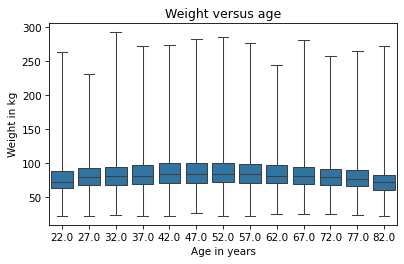

In [24]:
sns.boxplot(x='AGE', y='WTKG3', data=data, whis=10)

plt.xlabel('Age in years')
plt.ylabel('Weight in kg')
plt.title('Weight versus age');

Documentation of `boxplot` is at <https://seaborn.pydata.org/generated/seaborn.boxplot.html>.

Each box represents the distribution of weight in an age group.
The height of each box represents the interquartile range, which is the range from the 25th to the 75th percentile.
The line in the middle of each box is the median.

The keyword argument `whis` determines the behavior of the whiskers that extend above and below the boxes.
With `whis=10`, they extend far enough to show the minimum and maximum values.

In my opinion, this plot gives us the best view of the relationship between weight and age.

* Looking at the medians, we can see that people in their 40s are the heaviest; younger and older people are lighter.

* Looking at the sizes of the boxes, it seems like people in their 40s have the most variability in weight, too.

* Looking at the whiskers, we can see that the distribution of weight is skewed -- that is, the heaviest people are farther from the median than the lightest people.

When a distribution is skewed toward higher values, it is sometimes useful to plot it on a logarithmic scale.
We can do that with the Pyplot function `yscale`.

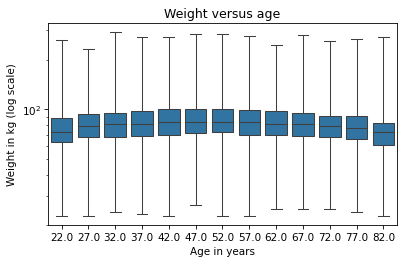

In [25]:
sns.boxplot(x='AGE', y='WTKG3', data=data, whis=10)

plt.yscale('log')
plt.xlabel('Age in years')
plt.ylabel('Weight in kg (log scale)')
plt.title('Weight versus age');

On a log scale, the distributions are symmetric, so the whiskers extend about the same distance in both directions, the boxes are close to the middle of the figure, and we can see the relationship between age and weight clearly.

In the following exercises, you can generate violin and box plots for other variables.

**Exercise:** Previously we looked at a scatter plot of height and weight, and saw that taller people tend to be heavier.
Now let's take a closer look using a box plot.
The `brfss` DataFrame contains a column named `_HTMG10` that represents height in centimeters, binned into 10 cm groups.

- Make a box plot that shows the distribution of weight in each height group.

- Plot the y-axis on a logarithmic scale.

Suggestion: If the labels on the x-axis collide, you can rotate them with `plt.xticks(rotation=45)`.

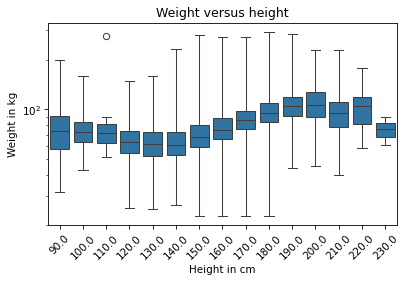

In [26]:
# Solution

data = brfss.dropna(subset=['_HTM4G10', 'WTKG3'])
sns.boxplot(x='_HTM4G10', y='WTKG3', data=data, whis=10)

plt.yscale('log')
plt.xticks(rotation=45)

plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')
plt.title('Weight versus height');

**Exercise:** As a second example, let's look at the relationship between income and height.  In the BRFSS, income is represented as a categorical variable -- that is, respondents are assigned to one of seven income categories.
The column name is `_INCOMG1`.
Before we connect income with anything else, let's look at the distribution by computing the PMF.
Extract `_INCOMG1` from `brfss` and assign it to `income`.
Then plot the PMF of `income` as a bar chart.

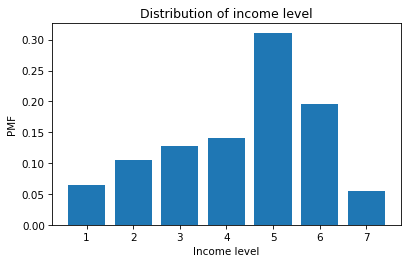

In [27]:
# Solution

income = brfss['_INCOMG1']
Pmf.from_seq(income).bar()

plt.xlabel('Income level')
plt.ylabel('PMF')
plt.title('Distribution of income level');

**Exercise:** Generate a violin plot that shows the distribution of height in each income group.
Can you see a relationship between these variables?

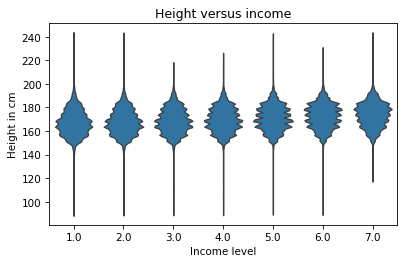

In [28]:
# Solution

data = brfss.dropna(subset=['_INCOMG1', 'HTM4'])
sns.violinplot(x='_INCOMG1', y='HTM4', data=data, inner=None)

plt.xlabel('Income level')
plt.ylabel('Height in cm')
plt.title('Height versus income');

## Quantifying Correlation

In the previous section, we visualized relationships between pairs of variables.
Now we'll quantify the strength of those relationships by computing their correlation.

When people say "correlation" casually, they might mean any relationship between two variables.
In statistics, it usually means a **correlation coefficient**, which is a number between -1 and 1 that quantifies the strength of a linear relationship between variables.
To demonstrate, we'll select three columns from the BRFSS dataset:

In [29]:
columns = ['HTM4', 'WTKG3', 'AGE']
subset = brfss[columns]

The result is a `DataFrame` with just those columns.
With this subset of the data, we can use the `corr` method, like this:

In [30]:
subset.corr()

,HTM4,WTKG3,AGE
HTM4,1.000000,0.469398,-0.122187
WTKG3,0.469398,1.000000,-0.067902
AGE,-0.122187,-0.067902,1.000000


The result is a **correlation matrix**.
Reading across the first row, the correlation of `HTM4` with itself is 1.
That's expected -- the correlation of anything with itself is 1.

The next entry is more interesting: the correlation of height and weight is about 0.45.
It's positive, which means taller people are heavier, and it's moderate in strength, which means it has some predictive value -- if you know someone's height, you can make a somewhat better guess about their weight.

The correlation between height and age is about -0.09.
It's negative, which means that older people tend to be shorter, but it's weak, which means that knowing someone's age would not help much if you were trying to guess their height.

Reading across the second row, we can see that the correlation of height and weight is the same as the correlation of weight and height -- because correlation is commutative.

And we can see that the correlation of weight and age is only 0.001, which is very small.
It is tempting to conclude that there is no relationship between age and weight, but we have already seen that there is.
So why is the correlation so low?
Remember that the relationship between weight and age looks like this.

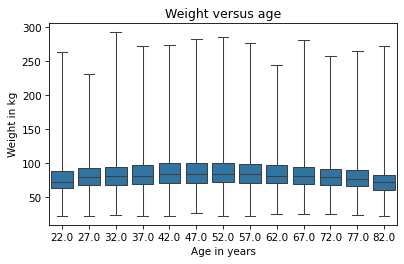

In [31]:
data = brfss.dropna(subset=['AGE', 'WTKG3'])
sns.boxplot(x='AGE', y='WTKG3', data=data, whis=10)

plt.xlabel('Age in years')
plt.ylabel('Weight in kg')
plt.title('Weight versus age');

As age increases, weight goes up and then down, so the relationship is nonlinear.
But correlation only measures linear relationships.
When the relationship is nonlinear, correlation generally underestimates how strong it is.

To demonstrate this point more clearly, let's generate some fake data: `xs` contains equally-spaced points between -1 and 1; `ys` is `xs` squared plus some random noise.

In [32]:
xs = np.linspace(-1, 1)
ys = xs**2 + np.random.normal(0, 0.05, len(xs))

Here's the scatter plot of these values.

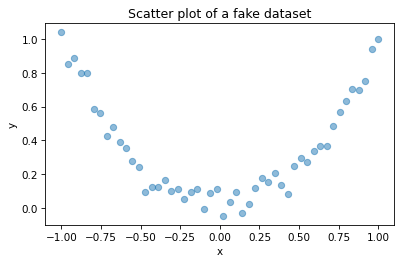

In [33]:
plt.plot(xs, ys, 'o', alpha=0.5)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter plot of a fake dataset');

This is a strong relationship in the sense that you can make a much better guess about `y` if you are given `x`.
But here's the correlation matrix:

In [34]:
np.corrcoef(xs, ys)

array([[ 1.        , -0.01716181],
       [-0.01716181,  1.        ]])

Even though there is a strong non-linear relationship, the computed correlation is close to zero.
In general, if correlation is high -- that is, close to 1 or -1 -- you can conclude that there is a strong linear relationship.
But if correlation is close to zero, that doesn't mean there is no relationship; there might be a non-linear relationship.
This is one reason correlation can be misleading.

And there's another reason to be careful with correlation -- it doesn't mean what people take it to mean.
Specifically, correlation says nothing about the slope of the line that fits the data.
If we say that two variables are correlated, that means we can use one to predict the other.  But that might not be what we care about.

For example, suppose we are concerned about the health effects of weight gain, so we plot weight versus age from 20 to 50 years old.
I'll generate two fake datasets to demonstrate the point.
In each dataset, `xs` represents age and `ys` represents weight.

I use `np.random.seed` to initialize the random number generator so we get the same results every time we run.

In [35]:
np.random.seed(18)
xs1 = np.linspace(20, 50)
ys1 = 75 + 0.02 * xs1 + np.random.normal(0, 0.15, len(xs1))

In [36]:
np.random.seed(18)
xs2 = np.linspace(20, 50)
ys2 = 65 + 0.2 * xs2 + np.random.normal(0, 3, len(xs2))

Here's what the two scatter plots look like.

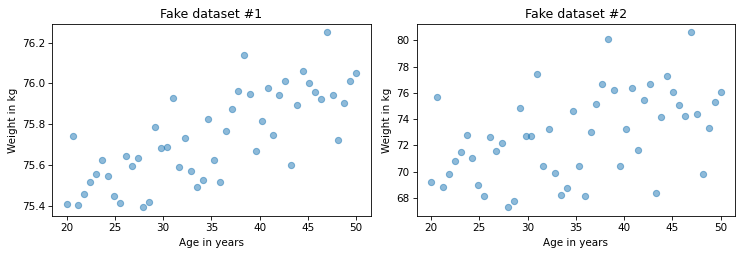

In [37]:
plt.figure(figsize=(8.75, 3.2))

plt.subplot(1, 2, 1)
plt.plot(xs1, ys1, 'o', alpha=0.5)
plt.xlabel('Age in years')
plt.ylabel('Weight in kg')
plt.title('Fake dataset #1')
plt.tight_layout()

plt.subplot(1, 2, 2)
plt.plot(xs2, ys2, 'o', alpha=0.5)
plt.xlabel('Age in years')
plt.ylabel('Weight in kg')
plt.title('Fake dataset #2')
plt.tight_layout()

I constructed these examples so they look similar, but they have substantially different correlations.

In [38]:
rho1 = np.corrcoef(xs1, ys1)[0, 1]
rho1

0.7579660563439401

In [39]:
rho2 = np.corrcoef(xs2, ys2)[0, 1]
rho2

0.4782776976576317

In the first dataset, the correlation is strong, close to 0.75.
In the second dataset, the correlation is moderate, close to 0.5.
So we might think the first relationship is more important.
But look more closely at the y-axis in both figures.

In the first example, the average weight gain over 30 years is less than 1 kilogram; in the second it is more than 5 kilograms!
If we are concerned about the health effects of weight gain, the second relationship is probably more important, even though the correlation is lower.
In this scenario, the statistic we really care about is the slope of the line that fits the data, not the coefficient of correlation.
In the next section, we'll use linear regression to compute that slope, but first let's practice with correlation.

**Exercise:** The purpose of the BRFSS is to explore health risk factors, so it includes questions about diet.
The column `_VEGESU1` represents the number of servings of vegetables respondents reported eating per day.
Before we compute correlations, let's look at the distribution of this variable.
Extract `_VEGESU1` from `brfss` and assign it to `vegesu` -- then plot the CDF of the values.

The original dataset includes a small number of values greater than 10, some of them unreasonably large.
For this extract, I have cut off the values at 10.

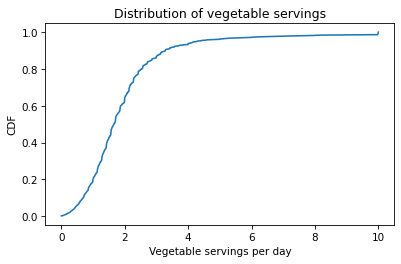

In [40]:
# Solution

vegesu = brfss['_VEGESU1']
Cdf.from_seq(vegesu).plot()

plt.xlabel('Vegetable servings per day')
plt.ylabel('CDF')
plt.title('Distribution of vegetable servings');

**Exercise:** Now let's visualize the relationship between age and vegetables.
Make a box plot that summarizes the distribution of vegetable servings in each age group.
How would you describe the relationship, if any?

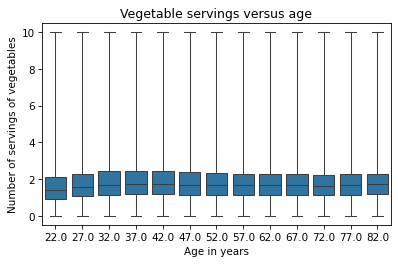

In [41]:
# Solution

# It looks like there is a nonlinear relationship.
# People in their twenties and thirties eat the most vegetables
# (maybe because they are raising children).
# Older and younger people eat fewer vegetables.

sns.boxplot(x='AGE', y='_VEGESU1', data=data, whis=10)
# plt.yscale('log')
plt.xlabel('Age in years')
plt.ylabel('Number of servings of vegetables')
plt.title('Vegetable servings versus age');

**Exercise:** Finally, let's look at correlations between age, income, and vegetable servings.

- From `brfss`, select the columns `'AGE'`, `_INCOMG1`, and `_VEGESU1`.
- Compute the correlation matrix for these variables.

Is the correlation between age and vegetable servings what you expected based on the box plot?

In [42]:
# Solution

# The correlation between age and vegetable servings is close to 0,
# because correlation doesn't measure non-linear relationships.
# We'll look at the relationship with income in another exercise.

columns = ['AGE', '_INCOMG1', '_VEGESU1']
subset = brfss[columns]
subset.corr()

,AGE,_INCOMG1,_VEGESU1
AGE,1.000000,-0.091466,0.000931
_INCOMG1,-0.091466,1.000000,0.088544
_VEGESU1,0.000931,0.088544,1.000000


## Simple Linear Regression

In the previous section we saw that correlation does not always measure what we really want to know.
In this section, we look at an alternative: simple linear regression.
Here "simple" means there are only two variables, as opposed to "multiple" regression, which can work with any number of variables.

In the previous section, I generated fake datasets showing two hypothetical relationships between weight and age.
We computed correlations for both datasets, now let's compute lines of best fit.
We can use `linregress` from the SciPy `stats` library, which takes two sequences as arguments.
Here are the results for Fake Dataset #1.

In [43]:
from scipy.stats import linregress

res1 = linregress(xs1, ys1)
res1._asdict()

{'slope': 0.018821034903244386,
 'intercept': 75.08049023710964,
 'rvalue': 0.7579660563439402,
 'pvalue': 1.8470158725246148e-10,
 'stderr': 0.002337849260560818,
 'intercept_stderr': 0.08439154079040358}

The result is a `LinregressResult` object that contains five values: `slope` is the slope of the line of best fit for the data, `intercept` is the intercept, and `rvalue` is correlation.
We'll ignore the other values for now.

For Fake Dataset #1, the estimated slope is about 0.019 kilograms per year or about 0.56 kilograms over the 30-year range.

In [44]:
res1.slope * 30

0.5646310470973316

Here are the results for Fake Dataset #2.

In [45]:
res2 = linregress(xs2, ys2)
res2._asdict()

{'slope': 0.17642069806488855,
 'intercept': 66.60980474219305,
 'rvalue': 0.47827769765763173,
 'pvalue': 0.0004430600283776241,
 'stderr': 0.04675698521121631,
 'intercept_stderr': 1.6878308158080697}

The estimated slope is almost 10 times higher, about 0.18 kilograms per year or about 5.3 kilograms per 30 years.

In [46]:
res2.slope * 30

5.292620941946657

We can use the results from `linregress` to plot the line of best fit and see how it relates to the data.
First we get the minimum and maximum of the observed `xs`.
Then we multiply by the slope and add the intercept.

In [47]:
low, high = xs1.min(), xs1.max()
fx = np.array([low, high])
fy = res1.intercept + res1.slope * fx

Here's what the result looks like for the first example.

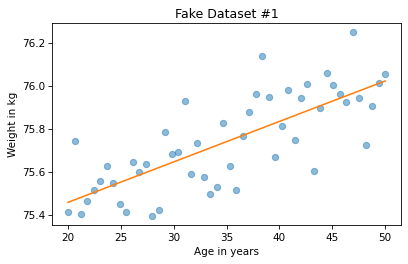

In [48]:
plt.plot(xs1, ys1, 'o', alpha=0.5)
plt.plot(fx, fy, '-')

plt.xlabel('Age in years')
plt.ylabel('Weight in kg')
plt.title('Fake Dataset #1');

We can do the same thing for the second example.

In [49]:
low, high = xs2.min(), xs2.max()
fx = np.array([low, high])
fy = res2.intercept + res2.slope * fx

And here's what the result looks like.

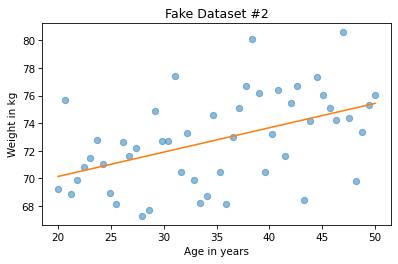

In [50]:
plt.plot(xs2, ys2, 'o', alpha=0.5)
plt.plot(fx, fy, '-')

plt.xlabel('Age in years')
plt.ylabel('Weight in kg')
plt.title('Fake Dataset #2');

At first glance it might seem like the slope is steeper in the first figure, but don't be fooled.
If you look closely at the vertical scales, the slope in the second figure is almost 10 times higher.

## Regression of Height and Weight

Now let's look at an example of regression with real data.
Here's the scatter plot of height and weight one more time.

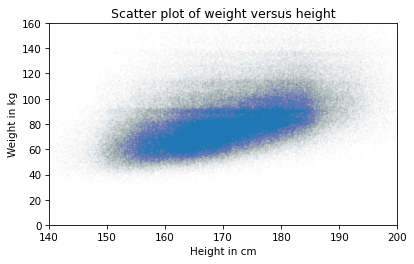

In [51]:
plt.plot(height_jitter, weight_jitter, 'o', 
         alpha=0.01, markersize=0.5)

plt.xlim([140, 200])
plt.ylim([0, 160])
plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')
plt.title('Scatter plot of weight versus height');

To compute the regression line, we'll use `linregress` again.
But it can't handle `NaN` values, so we have to use `dropna` to remove rows that are missing the data we need.

In [52]:
data = brfss.dropna(subset=['WTKG3', 'HTM4'])

Now we can compute the linear regression.

In [53]:
res_hw = linregress(data['HTM4'], data['WTKG3'])
res_hw._asdict()

{'slope': 0.9366891536604244,
 'intercept': -76.44247680097321,
 'rvalue': 0.4693981914367916,
 'pvalue': 0.0,
 'stderr': 0.002806793650907722,
 'intercept_stderr': 0.47939863668166327}

The slope is about 0.9 kilograms per centimeter, which means that we expect a person one centimeter taller to be almost a kilogram heavier.
That's quite a lot.
As before, we can compute the line of best fit:

In [54]:
low, high = data['HTM4'].min(), data['HTM4'].max()
fx = np.array([low, high])
fy = res_hw.intercept + res_hw.slope * fx

And here's what that looks like.  

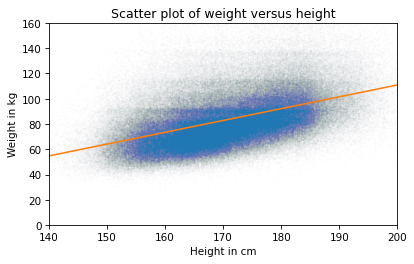

In [55]:
plt.plot(height_jitter, weight_jitter, 'o', alpha=0.01, markersize=0.5)
plt.plot(fx, fy, '-')

plt.xlim([140, 200])
plt.ylim([0, 160])
plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')
plt.title('Scatter plot of weight versus height');

The slope of this line seems consistent with the scatter plot.
As another example, here's the scatter plot of weight versus age, which we saw earlier.

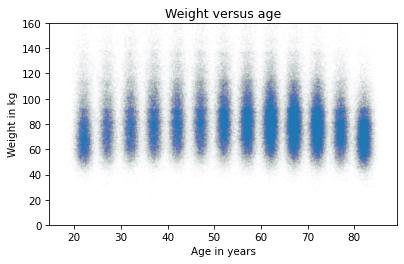

In [56]:
plt.plot(age_jitter, weight_jitter, 'o', 
         alpha=0.01, markersize=0.5)

plt.ylim([0, 160])
plt.xlabel('Age in years')
plt.ylabel('Weight in kg')
plt.title('Weight versus age');

As we have seen before, the relationship is nonlinear.
Let's see what we get if we compute a linear regression.

In [57]:
subset = brfss.dropna(subset=['WTKG3', 'AGE']) 
res_aw = linregress(subset['AGE'], subset['WTKG3'])
res_aw._asdict()

{'slope': -0.08138685042569352,
 'intercept': 87.66340016901641,
 'rvalue': -0.06790235862083926,
 'pvalue': 0.0,
 'stderr': 0.0019073328587490353,
 'intercept_stderr': 0.11019675319089409}

The estimated slope is close to zero.
Here's what the line of best fit looks like.

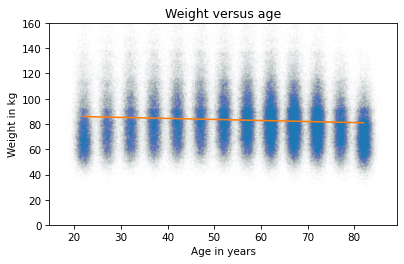

In [58]:
plt.plot(age_jitter, weight_jitter, 'o', 
         alpha=0.01, markersize=0.5)

low, high = data['AGE'].min(), data['AGE'].max()
fx = np.array([low, high])
fy = res_aw.intercept + res_aw.slope * fx
plt.plot(fx, fy, '-')

plt.ylim([0, 160])
plt.xlabel('Age in years')
plt.ylabel('Weight in kg')
plt.title('Weight versus age');

A straight line does not capture the relationship between these variables well.
That's because linear regression has the same problem as correlation -- it only measures the strength of a linear relationship.

In the next chapter, we'll see how to use multiple regression to quantify non-linear relationships.
But first, let's practice using simple regression.

**Exercise:** Who do you think eats more vegetables, people with low income, or people with high income?
Let's find out.
As we've seen previously, the column `_INCOMG1` represents income level and `_VEGESU1` represents the number of vegetable servings respondents reported eating per day.
Make a scatter plot with vegetable servings versus income, that is, with vegetable servings on the y-axis and income group on the x-axis.
You might want to use `ylim` to zoom in on the bottom half of the y-axis.

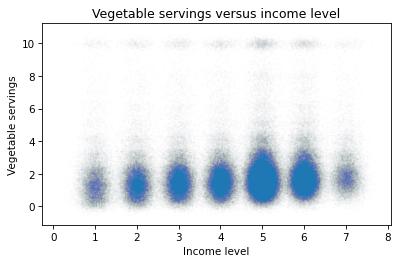

In [59]:
# Solution

income = brfss['_INCOMG1']
noise = np.random.normal(0, 0.2, len(income))
income_jitter = income + noise

veggies = brfss['_VEGESU1']
noise = np.random.normal(0, 0.2, len(veggies))
veggies_jitter = veggies + noise

# Make a scatter plot
plt.plot(income_jitter, veggies_jitter, 'o', 
         alpha=0.01, markersize=0.5)

plt.xlabel('Income level')
plt.ylabel('Vegetable servings')
plt.title('Vegetable servings versus income level');

**Exercise:** Now estimate the slope of the relationship between vegetable consumption and income.

- Use `dropna` to select rows where `_INCOMG1` and `_VEGESU1` are not `NaN`.

- Extract `_INCOMG1` and `_VEGESU1` and compute the simple linear regression of these variables.

- Finally, plot the regression line on top of the scatter plot.

What is the slope of the regression line?  What does this slope means in the context of the question we are exploring?

In [60]:
# Solution

data = brfss.dropna(subset=['_INCOMG1', '_VEGESU1'])
res_iv = linregress(data['_INCOMG1'], data['_VEGESU1'])
res_iv._asdict()

{'slope': 0.0822657914054152,
 'intercept': 1.6115664904733318,
 'rvalue': 0.08854365960295921,
 'pvalue': 0.0,
 'stderr': 0.0016594950840862995,
 'intercept_stderr': 0.0077259194623587124}

In [61]:
# Solution

low, high = data['_INCOMG1'].min(), data['_INCOMG1'].max()
fx1 = np.array([low, high])
fy1 = res_iv.intercept + res_iv.slope * fx1

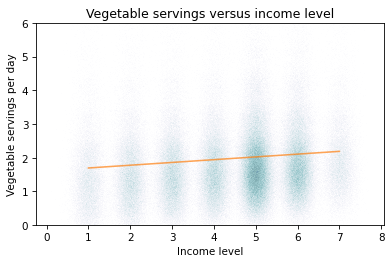

In [62]:
# Solution

plt.plot(income_jitter, veggies_jitter, 'o', alpha=0.01, markersize=0.4)
plt.plot(fx1, fy1, '-', alpha=0.7, color='C1')

plt.ylim([0, 6])
plt.xlabel('Income level')
plt.ylabel('Vegetable servings per day')
plt.title('Vegetable servings versus income level');

In [63]:
# Solution

# The estimated slope is 0.08, which means that
# people in higher income groups eat slightly more vegetables
# on average.  Between the lowest and the highest income group
# the difference is about half a vegetable serving per day.

## Summary

This chapter presents three ways to visualize the relationship between two variables: a scatter plot, violin plot, and box plot.
A scatter plot is often a good choice when you are exploring a new data set, but it can take some attention to avoid overplotting.
Violin plots and box plots are particularly useful when one of the variables has only a few unique values or the values have been rounded into bins.

We considered two ways to quantify the strength of a relationship: the coefficient of correlation and the slope of a regression line.
These statistics capture different aspect of what we might mean by "strength".
The coefficient of correlation indicates how well we can predict one variable, given the other.
The slope of the regression line indicates how much difference we expect in one variable as we vary the other.
One or the other might be more relevant, depending on the context.

*Elements of Data Science*

Copyright 2021 [Allen B. Downey](https://allendowney.com)

License: [Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International](https://creativecommons.org/licenses/by-nc-sa/4.0/)